In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Car details v3.csv")

In [3]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
df[df.isna().any(axis=1)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7846,Toyota Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
7996,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8009,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8068,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   object 
 10  max_power      7906 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 864.7+ KB


In [8]:
df['max_power_num'] = df['max_power'].str.extract(r'([\d.]+)').astype(float)
df['mileage_num'] = df['mileage'].str.extract(r'([\d.]+)').astype(float)
df['engine_num'] = df['engine'].str.extract(r'(\d+)').astype(float)



In [9]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_power_num,mileage_num,engine_num
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,74.00,23.40,1248.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,103.52,21.14,1498.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,78.00,17.70,1497.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,90.00,23.00,1396.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,88.20,16.10,1298.0


In [10]:
df['torque'].value_counts()

190Nm@ 2000rpm             530
200Nm@ 1750rpm             445
90Nm@ 3500rpm              405
113Nm@ 4200rpm             223
114Nm@ 4000rpm             171
                          ... 
128Nm@ 3100rpm               1
72.9Nm@ 2250rpm              1
155 Nm at 1600-2800 rpm      1
510Nm@ 1600-2800rpm          1
96  Nm at 3000  rpm          1
Name: torque, Length: 441, dtype: int64

In [11]:
# Function to convert kgm to Nm
def kgm_to_nm(kgm):
    return kgm * 9.81

# Convert all values in the "torque" column to strings
df['torque'] = df['torque'].astype(str)

# Extract torque components using regular expressions and convert to numeric
df['torque_value'] = df['torque'].str.extract(r'([\d.]+)\s*(?:Nm|kgm)?').astype(float)

# Check if torque values contain "kgm" and convert to Nm
kgm_mask = df['torque'].str.contains('kgm')
df.loc[kgm_mask, 'torque_value'] = df.loc[kgm_mask, 'torque_value'].apply(kgm_to_nm)


In [12]:
df[['torque_v', 'rpm']] = df["torque"].str.split(r'@|at', 1, expand=True)
df.drop(columns=['torque_v'], inplace=True)

In [13]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_power_num,mileage_num,engine_num,torque_value,rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,74.00,23.40,1248.0,190.000,2000rpm
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,103.52,21.14,1498.0,250.000,1500-2500rpm
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,78.00,17.70,1497.0,124.587,"2,700(kgm@ rpm)"
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,90.00,23.00,1396.0,219.744,1750-2750rpm
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,88.20,16.10,1298.0,112.815,"4,500(kgm@ rpm)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,82.85,18.50,1197.0,113.700,4000rpm
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,110.00,16.80,1493.0,235.440,"1,900-2,750(kgm@ rpm)"
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,73.90,19.30,1248.0,190.000,2000rpm
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,70.00,23.57,1396.0,140.000,1800-3000rpm


In [14]:
# Define a function to extract RPM values
import re
def extract_rpm(entry):
    # Convert the entry to a string
    entry = str(entry)
    
    # Use regex to find all numeric values, including commas
    rpm_values = re.findall(r'[\d,]+', entry)
    
    # If there are numeric values, calculate the average
    if rpm_values:
        # Remove commas and convert to integers
        rpm_values = [int(value.replace(',', '')) for value in rpm_values]
        
        if len(rpm_values) > 1:
            avg_rpm = sum(rpm_values) / len(rpm_values)
            return avg_rpm
        else:
            return rpm_values[0]
    
    
# Apply the function to the 'rpm_column'
df['extracted_rpm'] = df['rpm'].apply(extract_rpm)

In [15]:
df.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_power_num     0
mileage_num       0
engine_num        0
torque_value      0
rpm              42
extracted_rpm    42
dtype: int64

In [16]:
df = df.dropna()

In [17]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
max_power_num    0
mileage_num      0
engine_num       0
torque_value     0
rpm              0
extracted_rpm    0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7864 entries, 0 to 8127
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7864 non-null   object 
 1   year           7864 non-null   int64  
 2   selling_price  7864 non-null   int64  
 3   km_driven      7864 non-null   int64  
 4   fuel           7864 non-null   object 
 5   seller_type    7864 non-null   object 
 6   transmission   7864 non-null   object 
 7   owner          7864 non-null   object 
 8   mileage        7864 non-null   object 
 9   engine         7864 non-null   object 
 10  max_power      7864 non-null   object 
 11  torque         7864 non-null   object 
 12  seats          7864 non-null   float64
 13  max_power_num  7864 non-null   float64
 14  mileage_num    7864 non-null   float64
 15  engine_num     7864 non-null   float64
 16  torque_value   7864 non-null   float64
 17  rpm            7864 non-null   object 
 18  extracte

In [19]:
df.drop(columns=['torque','mileage','engine','max_power','rpm'], inplace=True)

In [20]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power_num,mileage_num,engine_num,torque_value,extracted_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,74.00,23.40,1248.0,190.000,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,103.52,21.14,1498.0,250.000,2000.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,78.00,17.70,1497.0,124.587,2700.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,90.00,23.00,1396.0,219.744,2250.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,88.20,16.10,1298.0,112.815,4500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,5.0,82.85,18.50,1197.0,113.700,4000.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,5.0,110.00,16.80,1493.0,235.440,2325.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,5.0,73.90,19.30,1248.0,190.000,2000.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,5.0,70.00,23.57,1396.0,140.000,2400.0


In [21]:
len(df[df.duplicated()])

1159

In [22]:
df[df.duplicated(subset= None)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power_num,mileage_num,engine_num,torque_value,extracted_rpm
291,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,5.0,82.00,18.90,1197.0,114.0,4000.0
296,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,5.0,85.80,18.60,1197.0,114.0,4000.0
370,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,5.0,177.00,13.60,1999.0,430.0,2125.0
371,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,5.0,214.56,22.37,2487.0,202.0,4400.0
372,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,5.0,177.00,19.33,1999.0,430.0,2125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7987,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,5.0,108.45,20.37,1461.0,240.0,1750.0
7988,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,5.0,88.50,28.09,1248.0,200.0,1750.0
8117,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,5.0,74.00,26.59,1248.0,190.0,2000.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,5.0,70.00,23.57,1396.0,140.0,2400.0


In [23]:
df = df.drop_duplicates()

In [24]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power_num,mileage_num,engine_num,torque_value,extracted_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,74.00,23.40,1248.0,190.000,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,103.52,21.14,1498.0,250.000,2000.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,78.00,17.70,1497.0,124.587,2700.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,90.00,23.00,1396.0,219.744,2250.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,88.20,16.10,1298.0,112.815,4500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,5.0,67.10,18.90,998.0,90.000,3500.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,5.0,88.73,22.54,1396.0,219.700,2125.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,5.0,82.85,18.50,1197.0,113.700,4000.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,5.0,110.00,16.80,1493.0,235.440,2325.0


In [25]:
len(df[df.duplicated()])

0

In [26]:
df['years_old']= 2023 - df['year'] 

In [27]:
df.drop(columns=["year"],inplace=True)

In [28]:
df.to_csv("cardekho_edited")

In [29]:
df

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power_num,mileage_num,engine_num,torque_value,extracted_rpm,years_old
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,5.0,74.00,23.40,1248.0,190.000,2000.0,9
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,103.52,21.14,1498.0,250.000,2000.0,9
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,78.00,17.70,1497.0,124.587,2700.0,17
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,5.0,90.00,23.00,1396.0,219.744,2250.0,13
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,5.0,88.20,16.10,1298.0,112.815,4500.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,260000,50000,Petrol,Individual,Manual,Second Owner,5.0,67.10,18.90,998.0,90.000,3500.0,10
8122,Hyundai i20 Magna 1.4 CRDi,475000,80000,Diesel,Individual,Manual,Second Owner,5.0,88.73,22.54,1396.0,219.700,2125.0,9
8123,Hyundai i20 Magna,320000,110000,Petrol,Individual,Manual,First Owner,5.0,82.85,18.50,1197.0,113.700,4000.0,10
8124,Hyundai Verna CRDi SX,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,5.0,110.00,16.80,1493.0,235.440,2325.0,16


## Exploratory Data Analysis


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

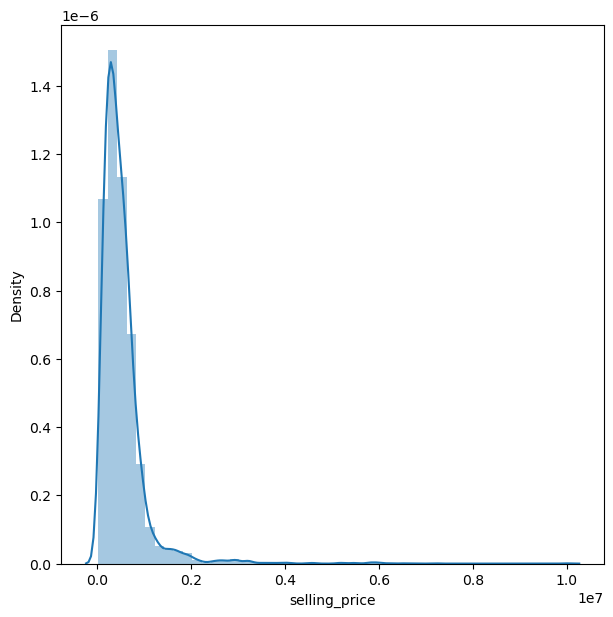

In [30]:
# Dependent variable 'selling_rice'
plt.figure(figsize=(7,7))
sns.distplot(df['selling_price'])

<AxesSubplot:xlabel='selling_price', ylabel='Density'>

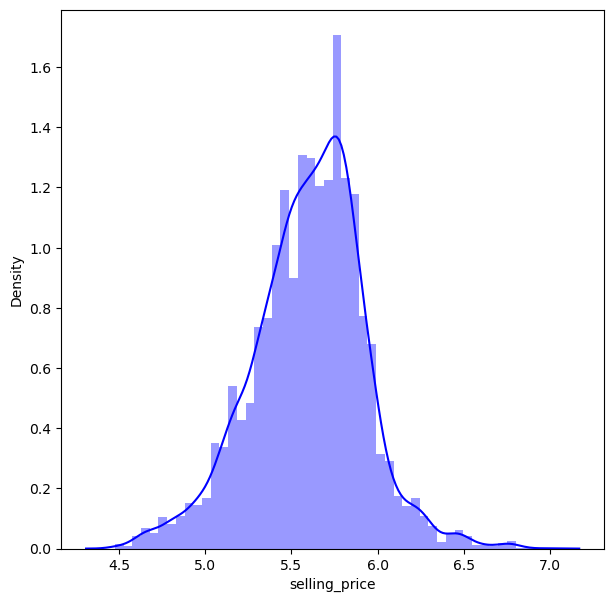

In [31]:
# Dependent variable 'selling_Price'
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df['selling_price']),color="b")

In [32]:
numeric_features = df.describe().columns
numeric_features

Index(['selling_price', 'km_driven', 'seats', 'max_power_num', 'mileage_num',
       'engine_num', 'torque_value', 'extracted_rpm', 'years_old'],
      dtype='object')

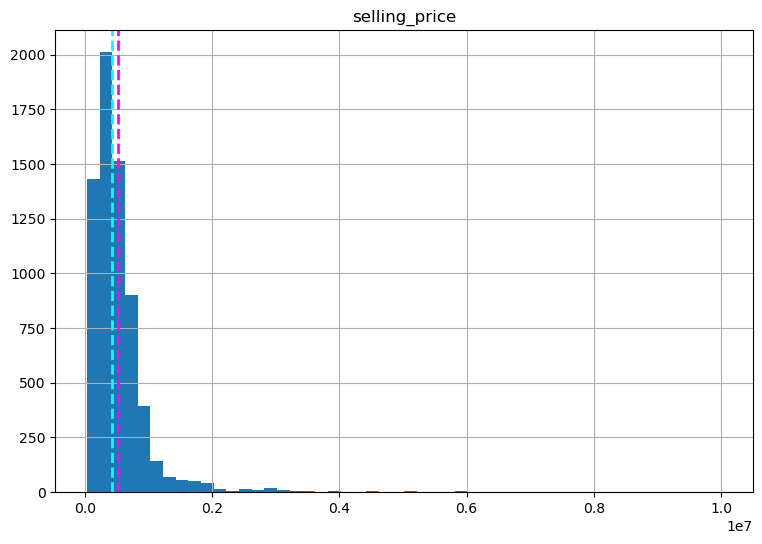

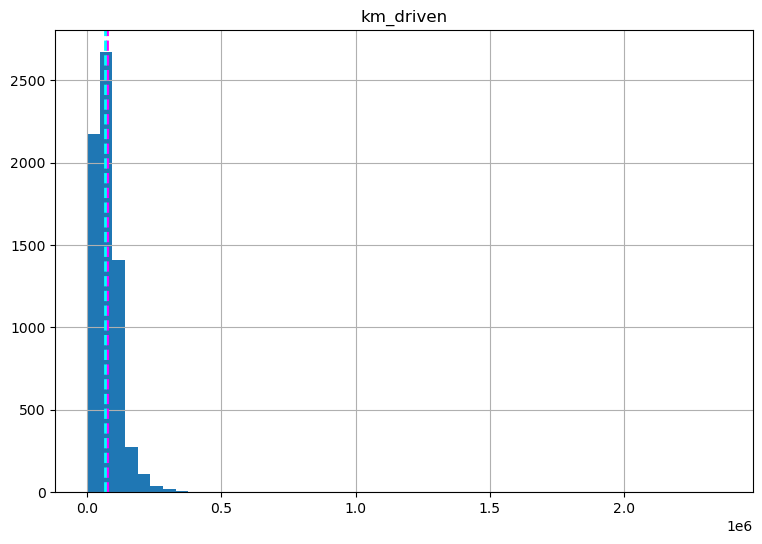

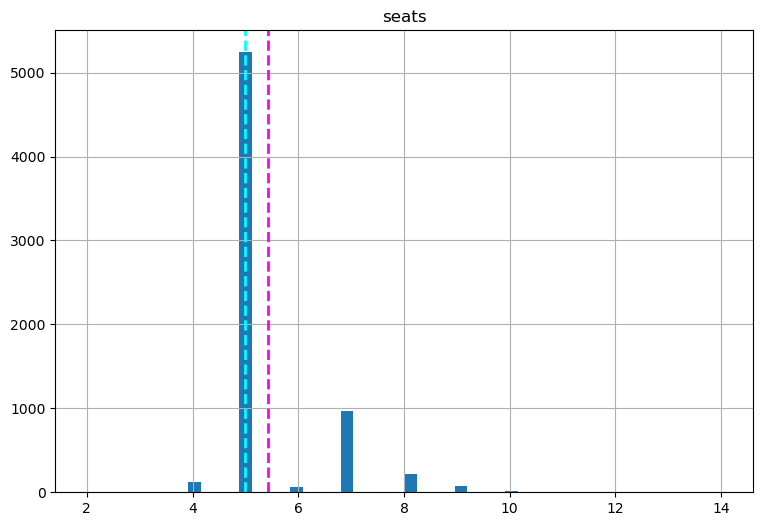

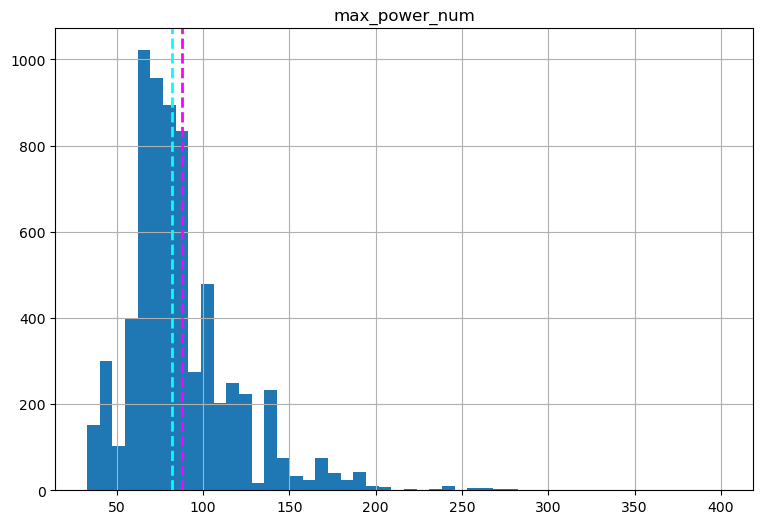

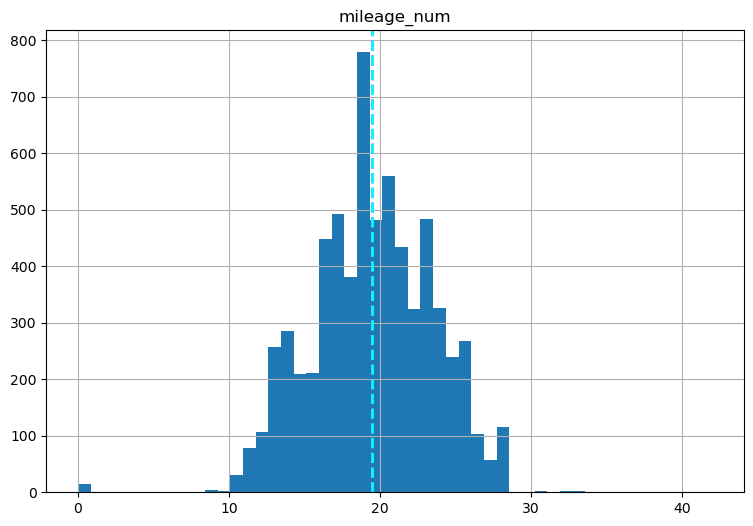

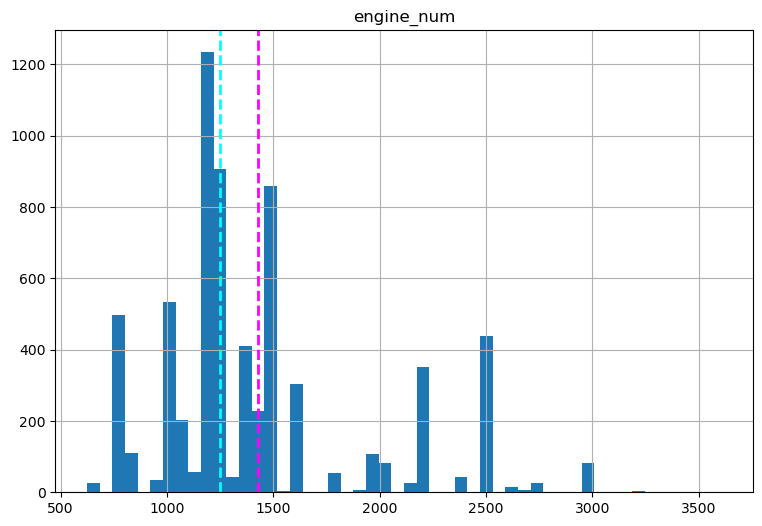

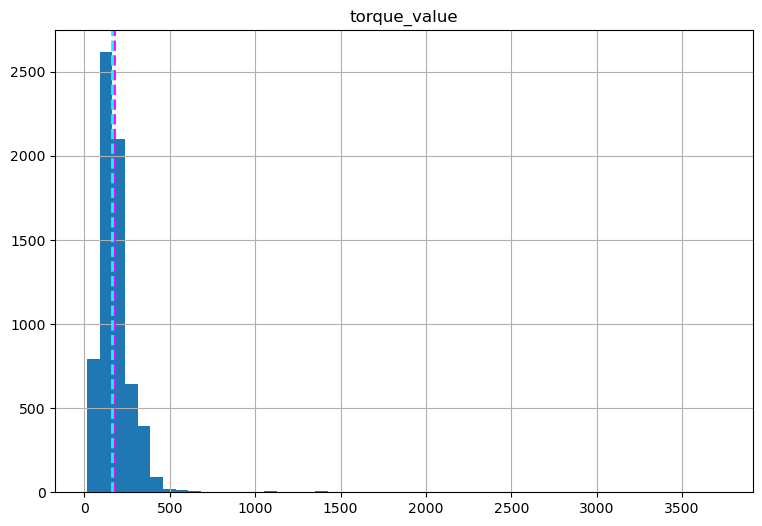

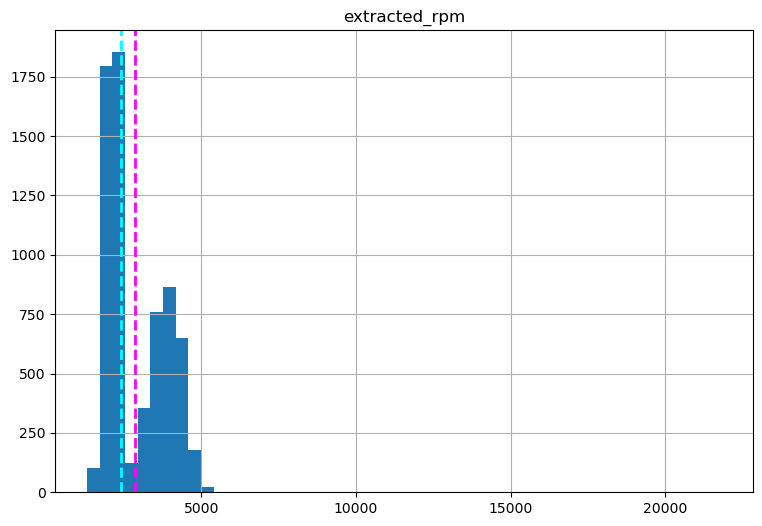

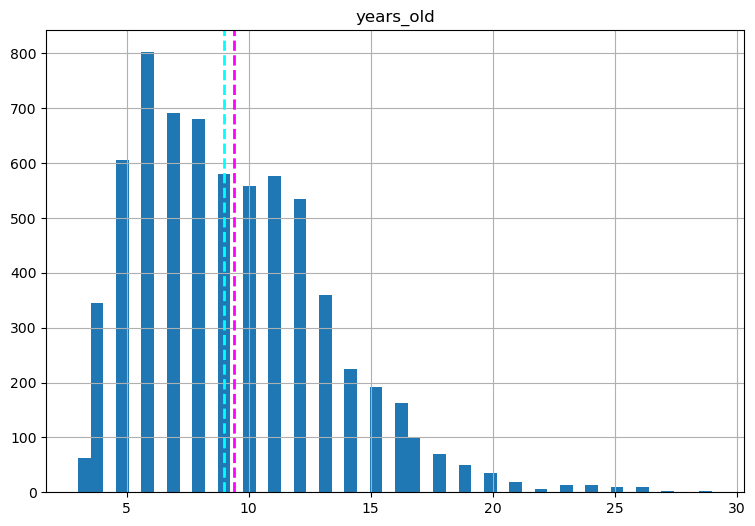

In [33]:
# plot a bar plot for each numerical feature count 

for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [34]:
df["max_power_num"].describe()

count    6705.000000
mean       87.717061
std        31.618516
min        32.800000
25%        68.000000
50%        81.830000
75%       100.000000
max       400.000000
Name: max_power_num, dtype: float64

In [35]:
len(df[df["max_power_num"]>300])

1

In [36]:
df = df[df["max_power_num"] <= 300]

In [37]:
df["mileage_num"].describe()

count    6704.000000
mean       19.468817
std         4.034210
min         0.000000
25%        16.800000
50%        19.465000
75%        22.540000
max        33.440000
Name: mileage_num, dtype: float64

In [38]:
len(df[df["mileage_num"] == 0])

14

In [39]:
non_zero_mileage = df[df["mileage_num"] > 0]["mileage_num"]
mean_value = non_zero_mileage.mean()


df.loc[df["mileage_num"] == 0, "mileage_num"] = mean_value  

In [40]:
len(df[df["mileage_num"] > 30])

7

In [41]:
df["torque_value"].describe()

count    6704.000000
mean      174.528831
std       115.268770
min        14.900000
25%       110.000000
50%       160.000000
75%       200.124000
max      3727.800000
Name: torque_value, dtype: float64

In [42]:
len(df[df["torque_value"]>500])

52

In [43]:
cap_value = 500
df.loc[df["torque_value"] > cap_value, "torque_value"] = cap_value

In [44]:
df["extracted_rpm"].describe()

count     6704.00000
mean      2863.88656
std        978.30719
min       1300.00000
25%       2000.00000
50%       2400.00000
75%       4000.00000
max      21800.00000
Name: extracted_rpm, dtype: float64

In [45]:
len(df[df["extracted_rpm"]>8000])

1

In [46]:
df = df[df["extracted_rpm"] <= 8000]

In [47]:
df["engine_num"].describe()

count    6703.000000
mean     1429.910189
std       493.410779
min       624.000000
25%      1197.000000
50%      1248.000000
75%      1498.000000
max      3604.000000
Name: engine_num, dtype: float64

In [48]:
len(df[df["engine_num"]>3000])

6

In [49]:
cap_value = 3000
df.loc[df["engine_num"] > cap_value, "engine_num"] = cap_value

In [50]:
df["km_driven"].describe()

count    6.703000e+03
mean     7.333117e+04
std      5.865713e+04
min      1.000000e+00
25%      3.800000e+04
50%      6.814000e+04
75%      1.000000e+05
max      2.360457e+06
Name: km_driven, dtype: float64

In [51]:
len(df[df["km_driven"]>300000])

18

In [52]:
df = df[df["km_driven"] <= 300000]

In [53]:
df["selling_price"].describe()

count    6.685000e+03
mean     5.229597e+05
std      5.013169e+05
min      2.999900e+04
25%      2.500000e+05
50%      4.200000e+05
75%      6.500000e+05
max      7.200000e+06
Name: selling_price, dtype: float64

In [54]:
len(df[df["selling_price"]>3000000])

44

In [55]:
cap_value = 3000000
df.loc[df["selling_price"] > cap_value, "selling_price"] = cap_value

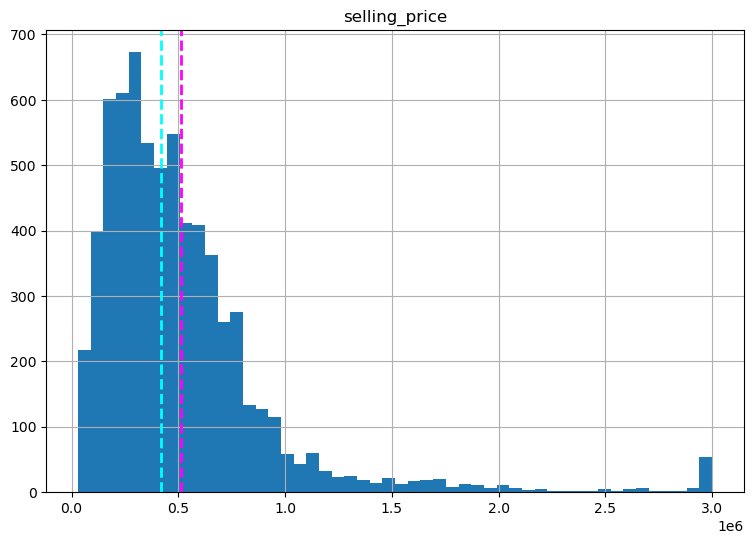

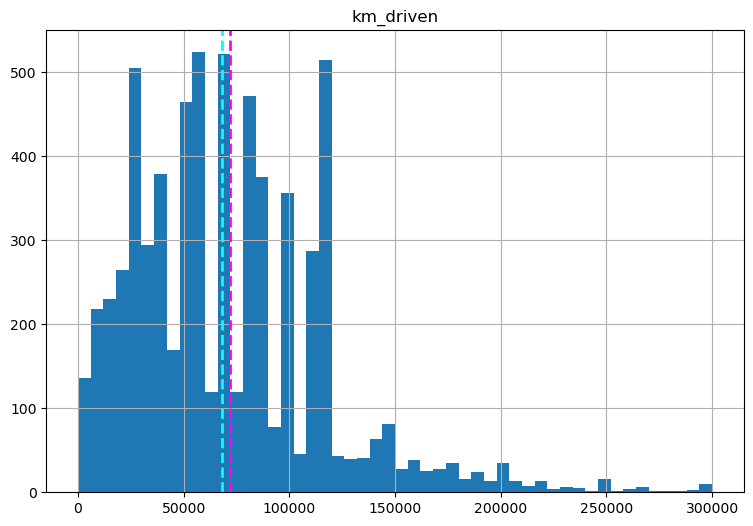

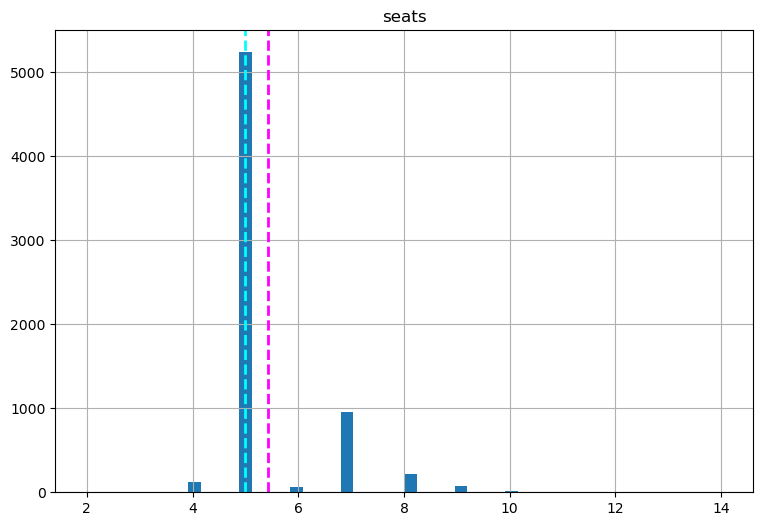

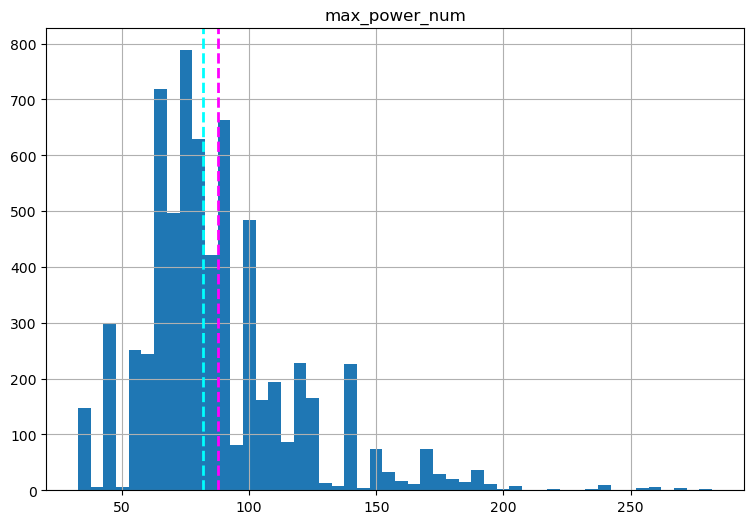

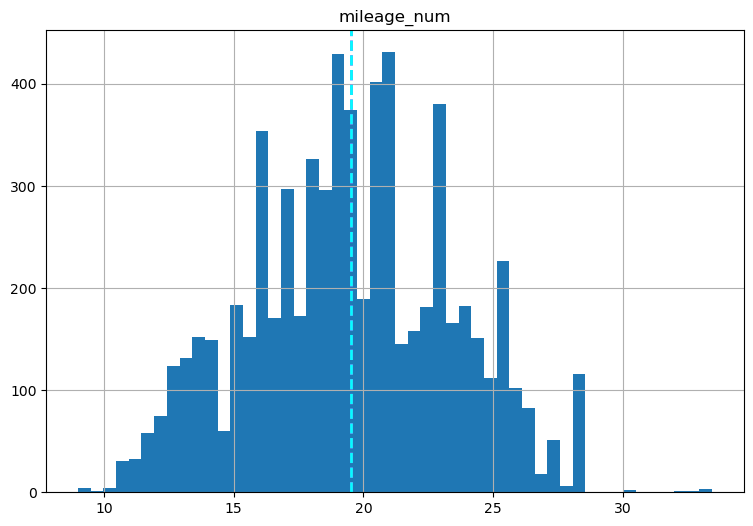

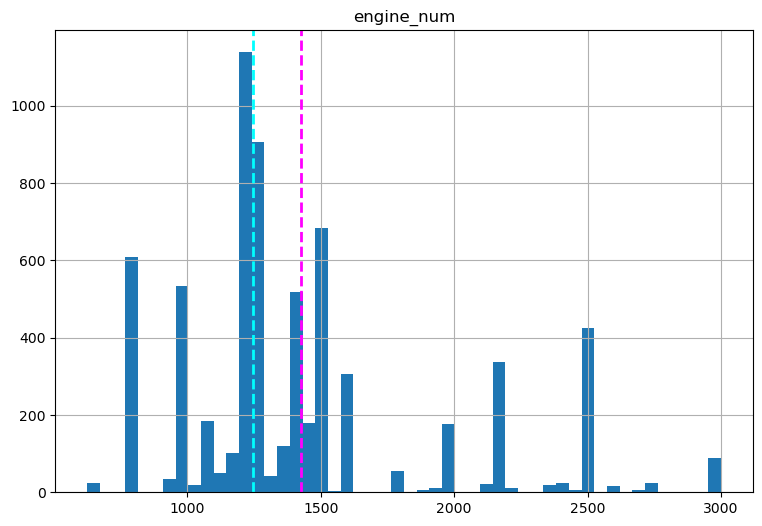

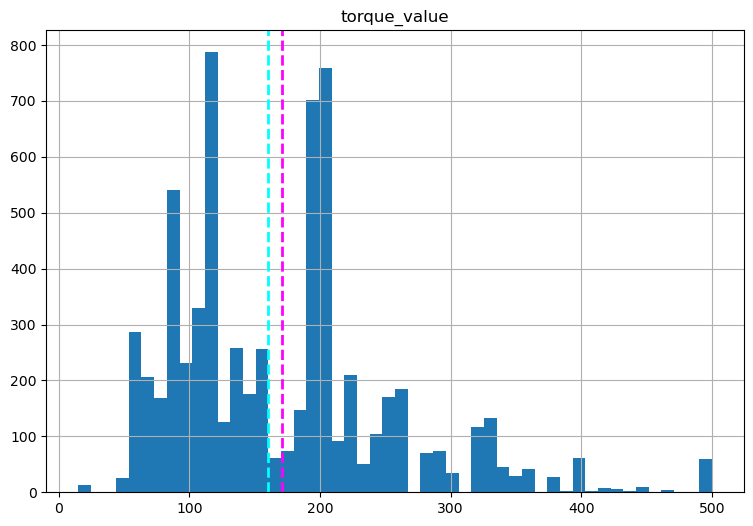

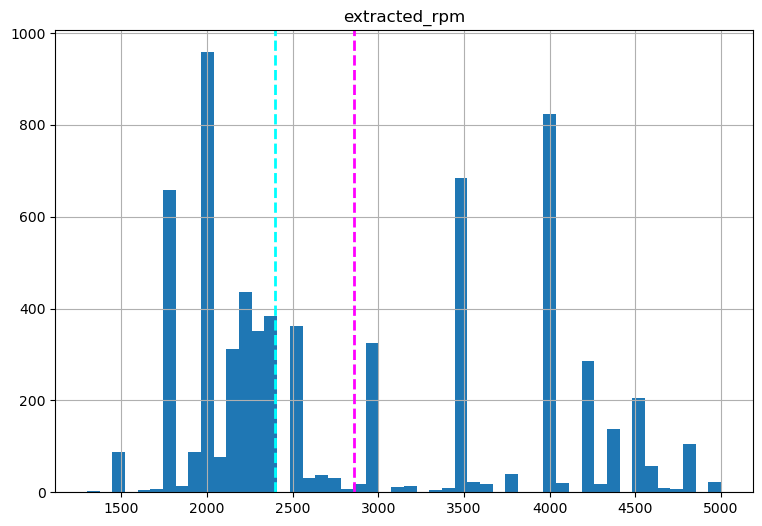

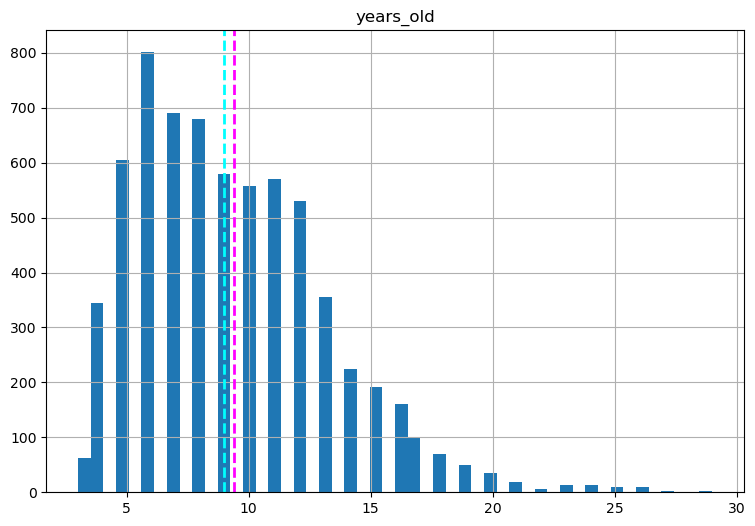

In [56]:
# plot a bar plot for each numerical feature count 

for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

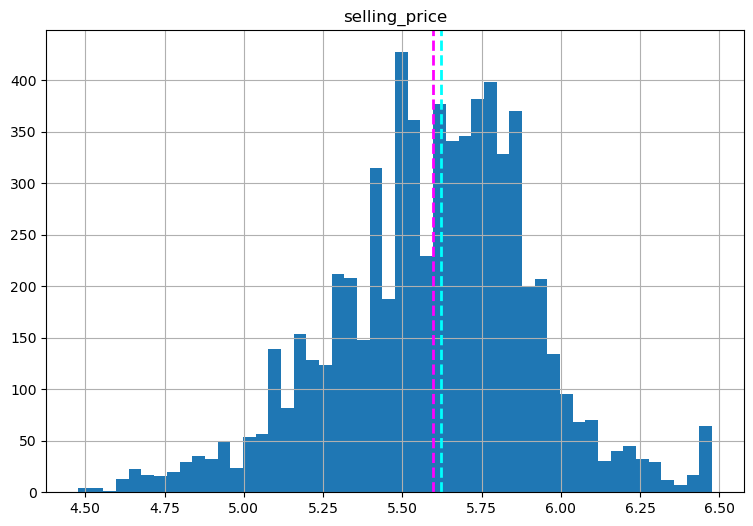

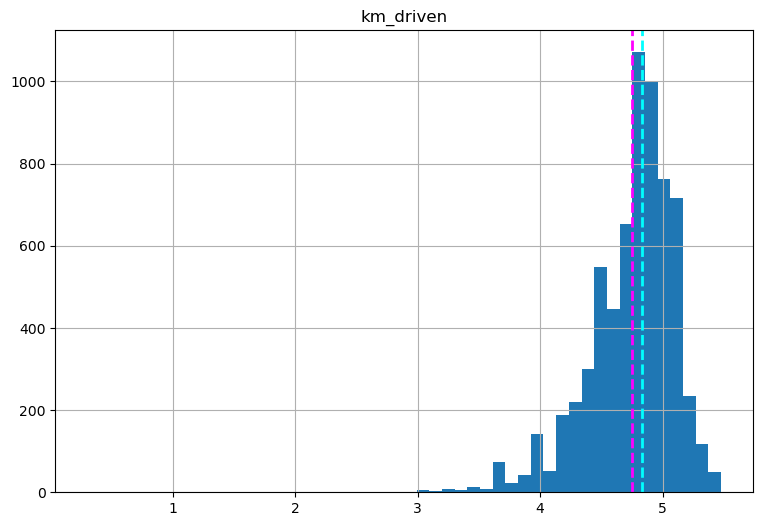

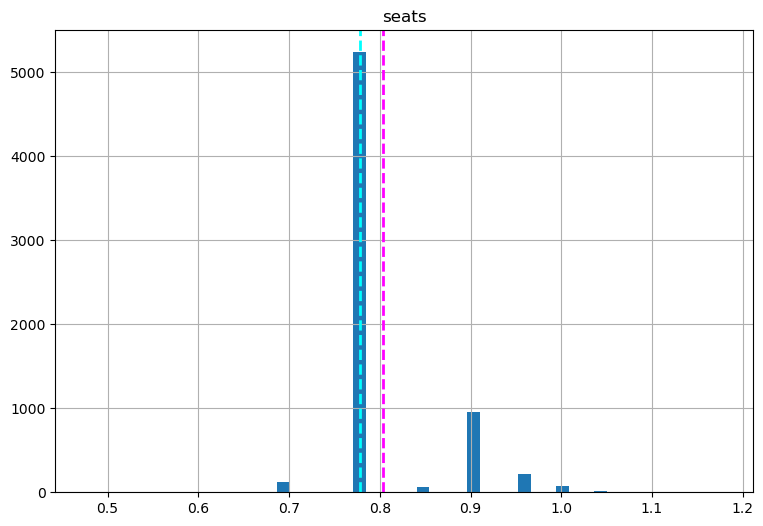

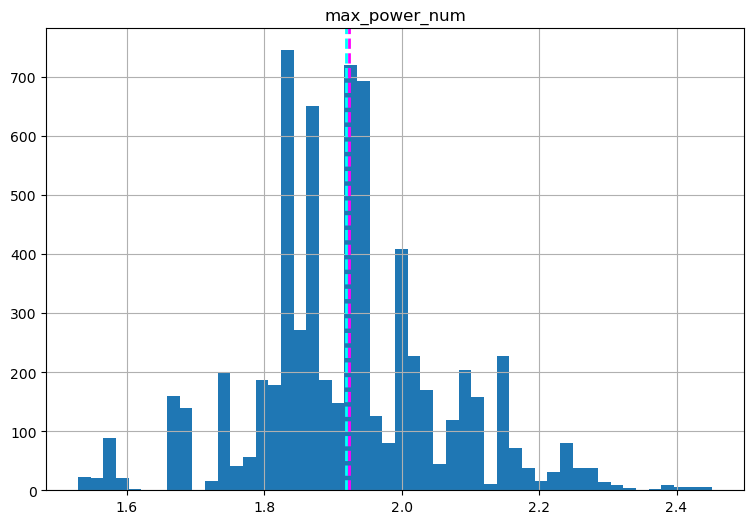

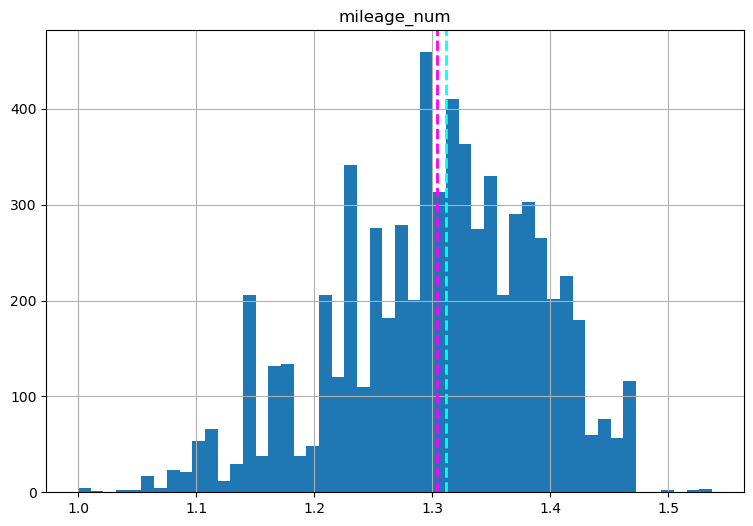

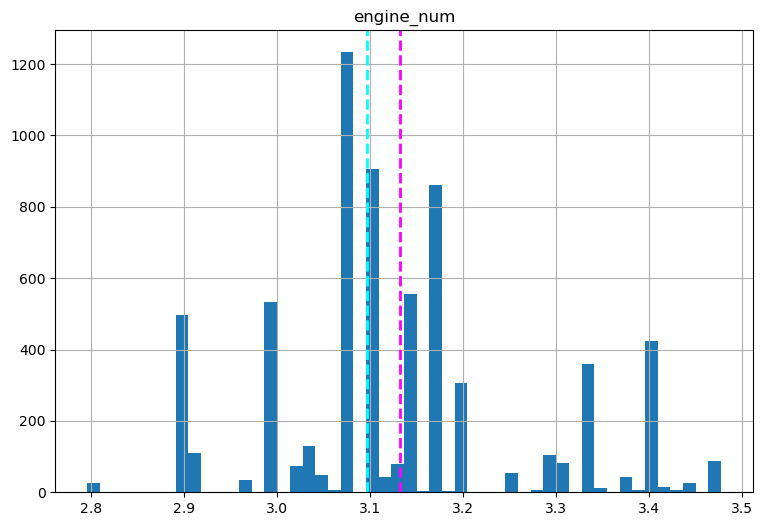

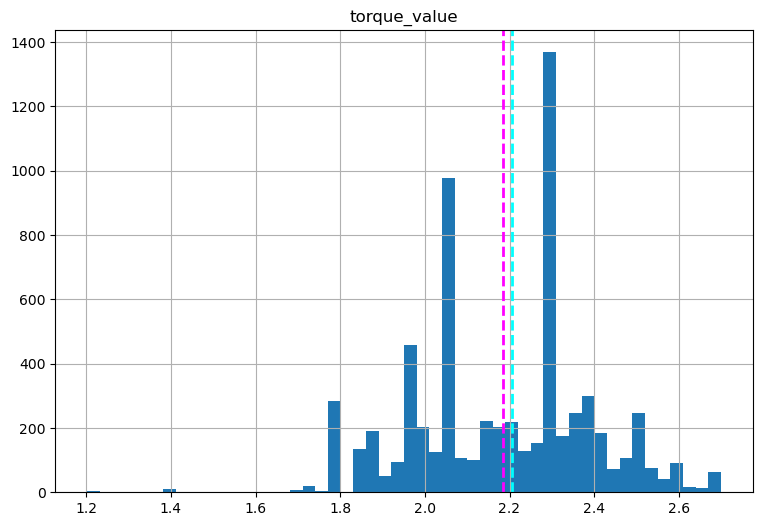

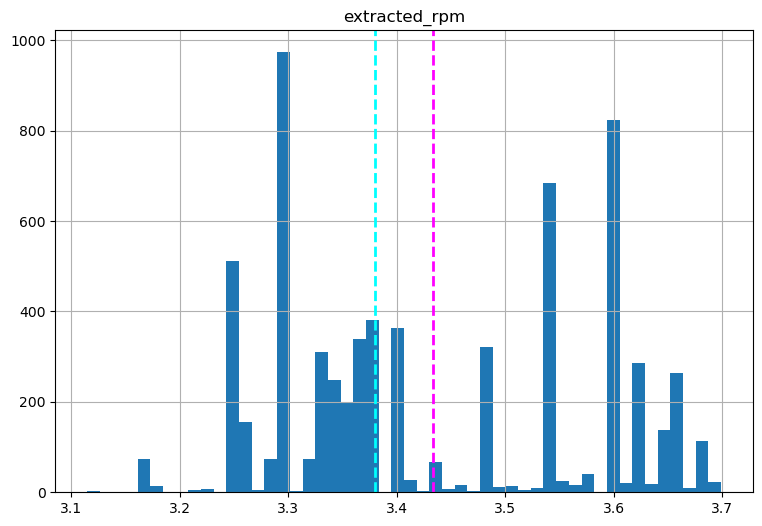

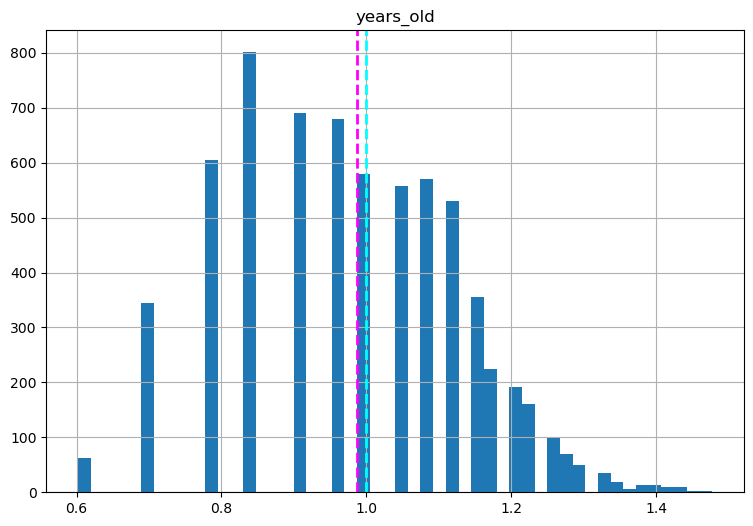

In [57]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    
    # Apply a log transformation with handling for zero or negative values
    feature = np.log10(df[col] + 1)  # Adding 1 to avoid log(0)
    
    feature.hist(bins=50, ax=ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)

plt.show()

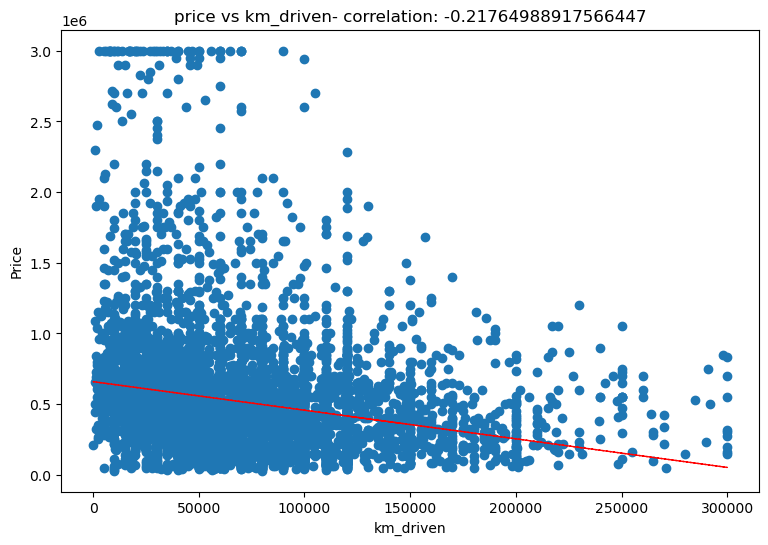

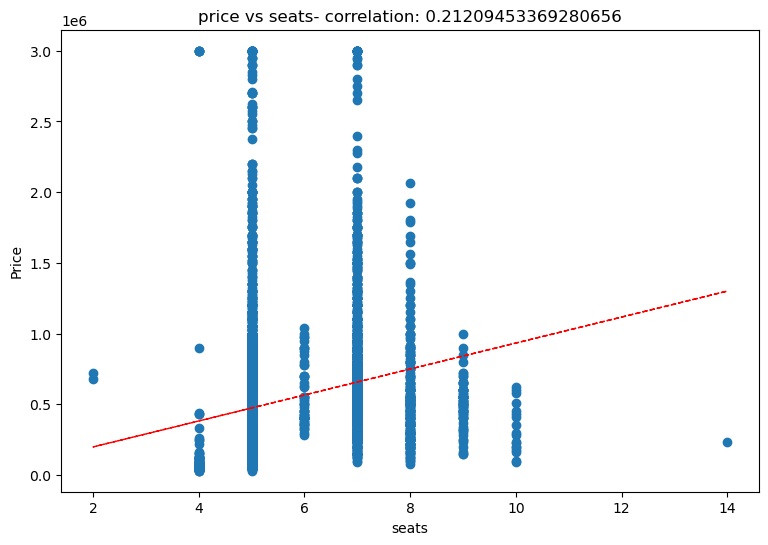

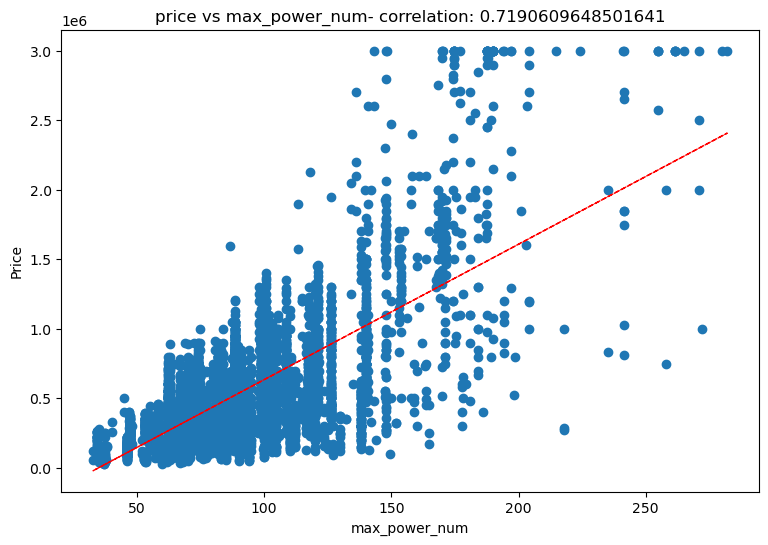

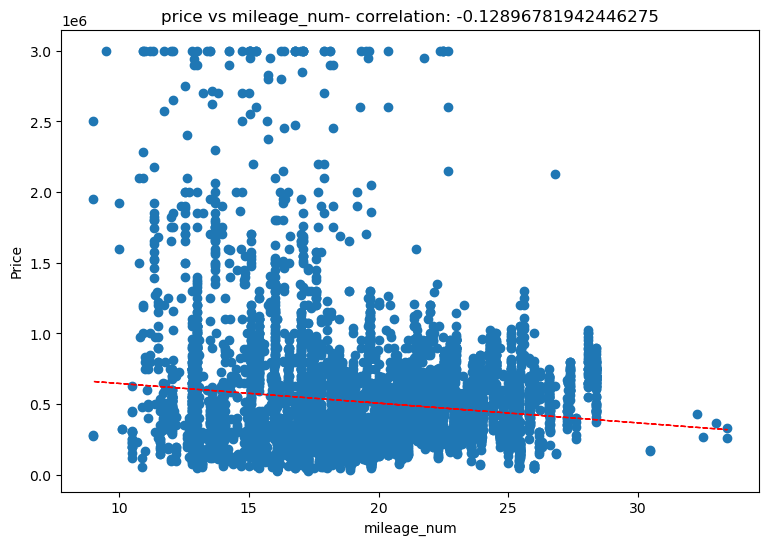

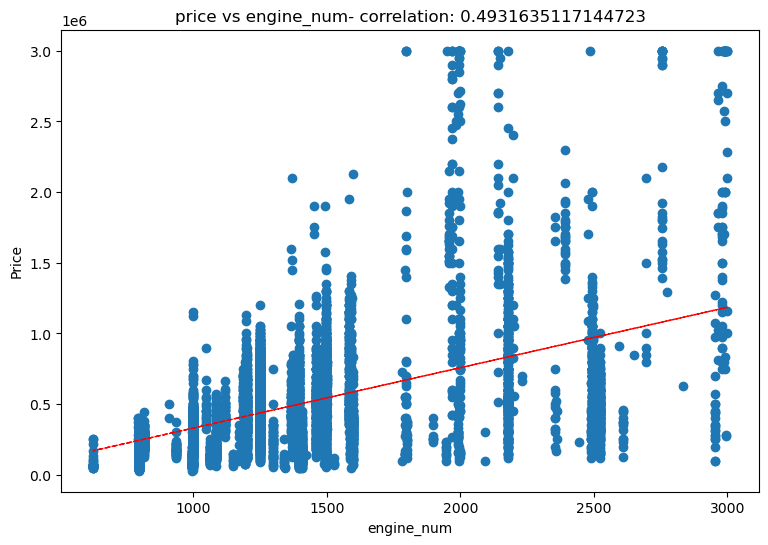

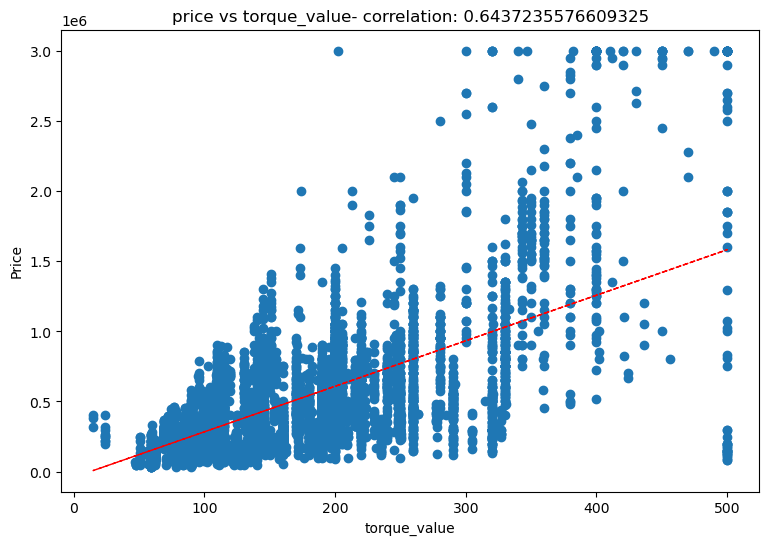

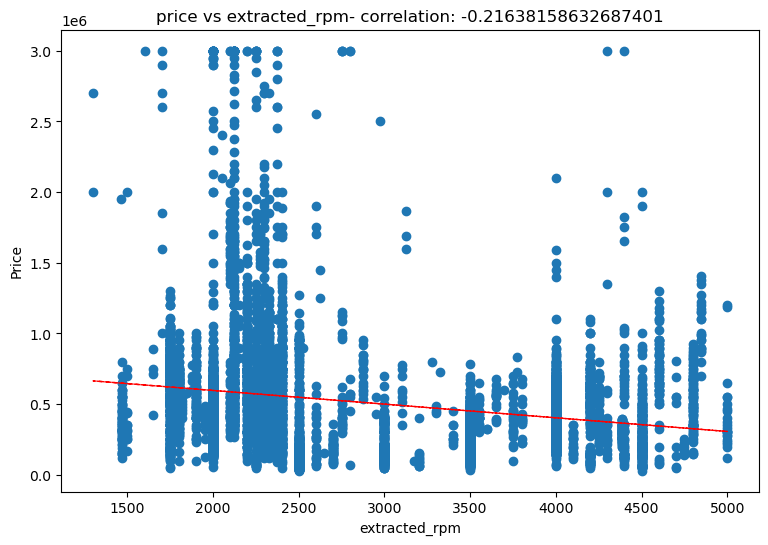

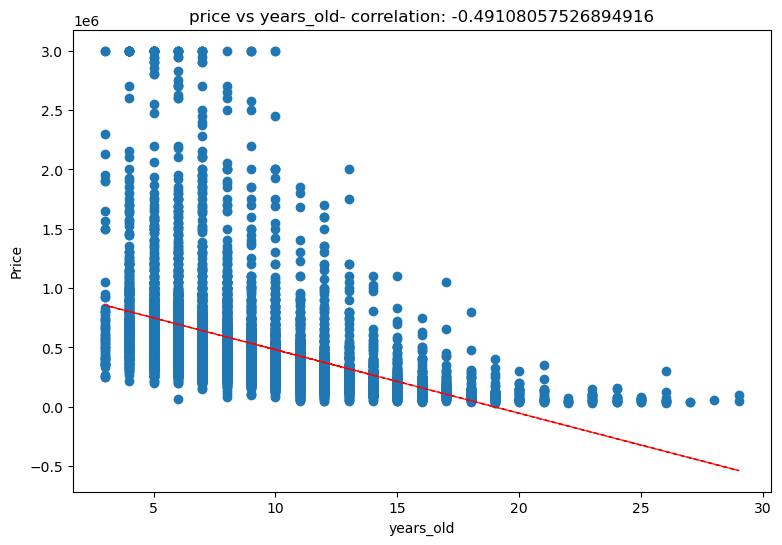

In [58]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['selling_price']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Price')
    ax.set_title('price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['selling_price'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

<AxesSubplot:>

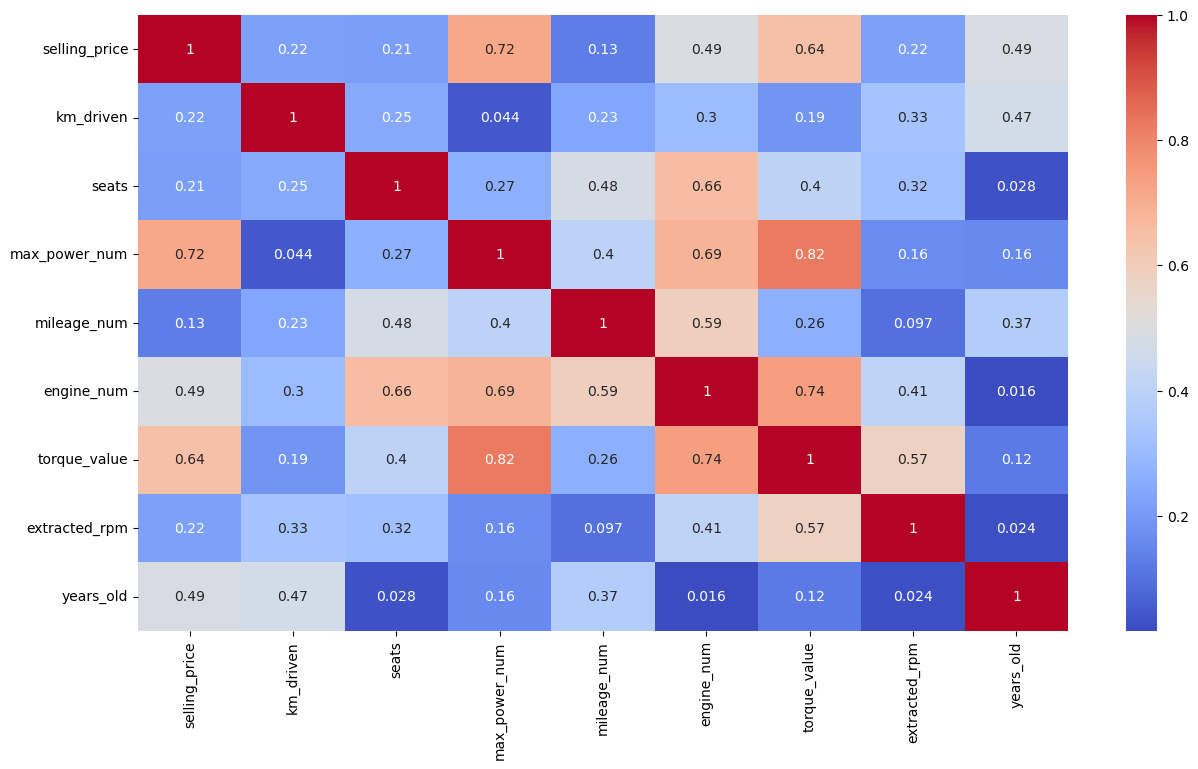

In [59]:
## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [60]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [61]:
calc_vif(df[[i for i in df.describe().columns if i not in ['selling_price']]])

,variables,VIF
0,km_driven,5.466096
1,seats,50.729011
2,max_power_num,55.473951
3,mileage_num,16.050923
4,engine_num,45.029197
5,torque_value,41.749804
6,extracted_rpm,22.098676
7,years_old,8.500948


In [62]:
calc_vif(df[[i for i in df.describe().columns if i not in ['selling_price', 'km_driven', 'seats','engine_num','torque_value', 'mileage_num']]])

,variables,VIF
0,max_power_num,4.927666
1,extracted_rpm,5.801245
2,years_old,4.838157


In [63]:
calc_vif(df[[i for i in df.describe().columns if i not in ['selling_price', 'km_driven', 'seats','engine_num','torque_value', 'mileage_num']]])

,variables,VIF
0,max_power_num,4.927666
1,extracted_rpm,5.801245
2,years_old,4.838157


In [64]:
numerical_features = ['km_driven','mileage_num','years_old']

In [65]:
df['name'].unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

In [66]:
df['car_company'] = df['name'].str.split(" ", expand=True)[0]

In [67]:
df['car_company'].value_counts()

Maruti           2086
Hyundai          1211
Mahindra          704
Tata              632
Honda             361
Ford              353
Toyota            317
Chevrolet         216
Renault           206
Volkswagen        173
Nissan             73
Skoda              62
Datsun             57
Mercedes-Benz      46
BMW                45
Fiat               39
Audi               33
Jeep               22
Mitsubishi         11
Jaguar              8
Volvo               4
Isuzu               4
Ambassador          4
Force               4
Daewoo              3
MG                  3
Kia                 3
Land                2
Ashok               1
Lexus               1
Opel                1
Name: car_company, dtype: int64

In [68]:
categorical_features = df.describe(include=['object','category']).columns

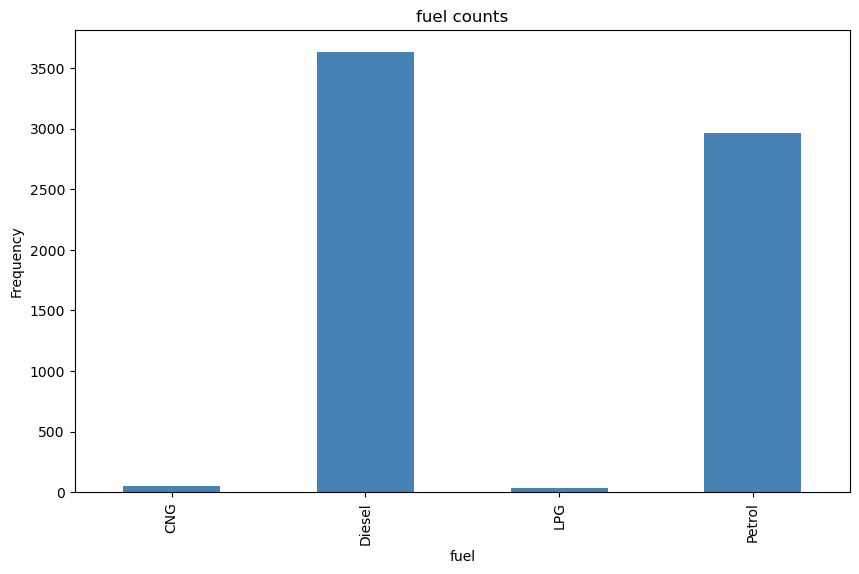

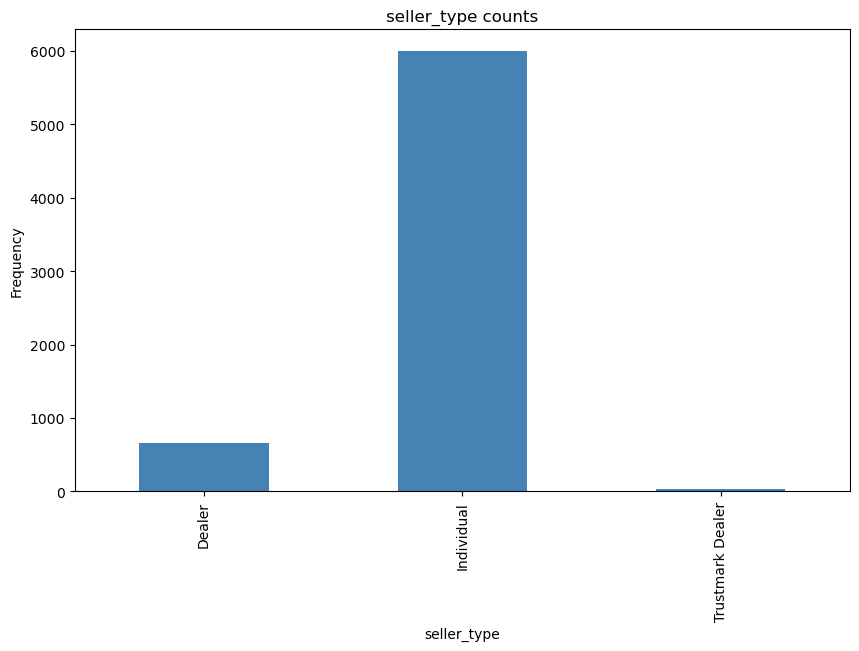

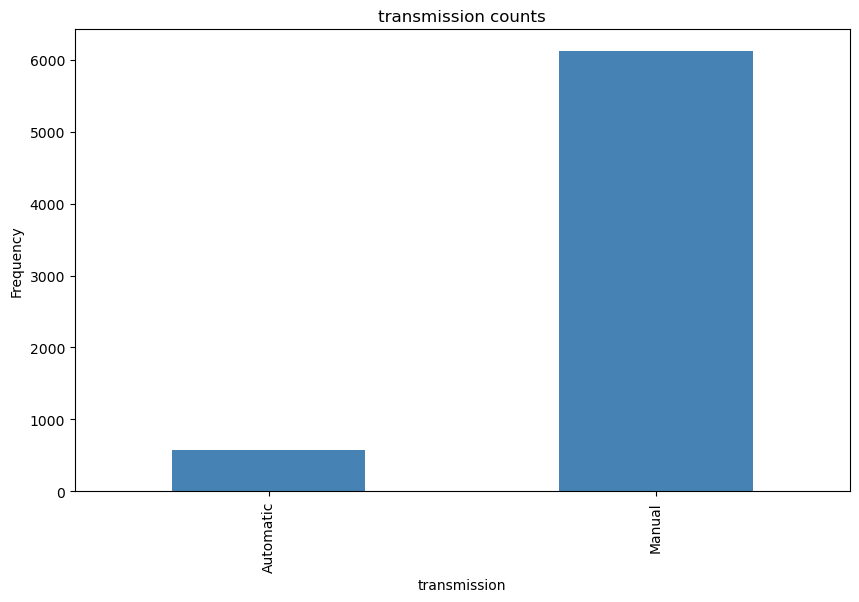

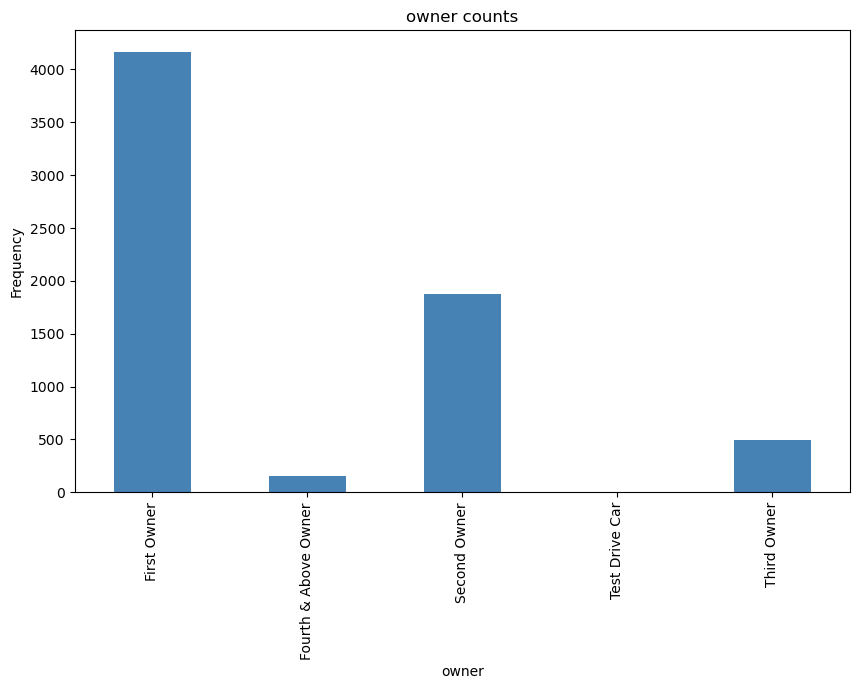

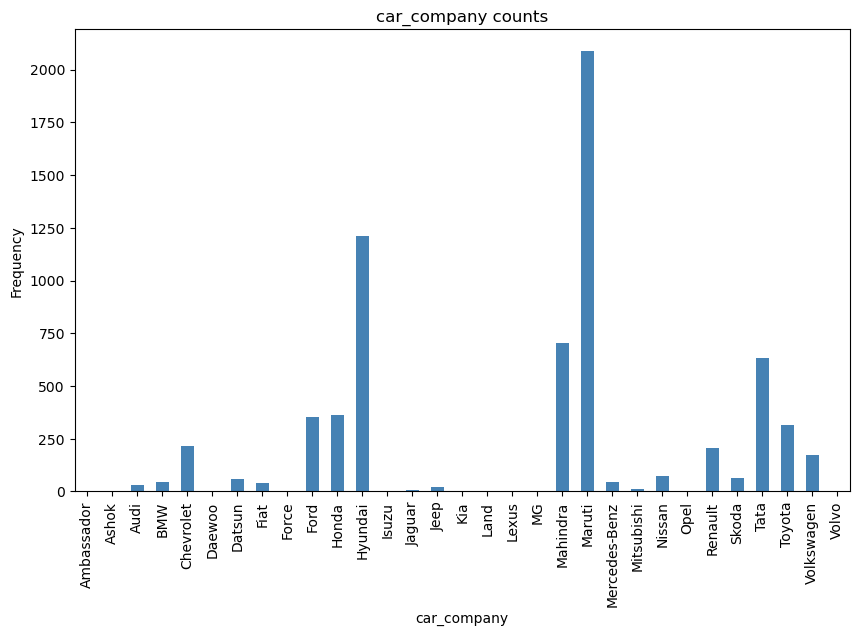

In [69]:
import matplotlib.pyplot as plt

for col in categorical_features:
    # Skip plotting for the 'name' column
    if col == 'name':
        continue

    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(10, 6))
    ax = fig.gca()
    counts.plot.bar(ax=ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

plt.show()

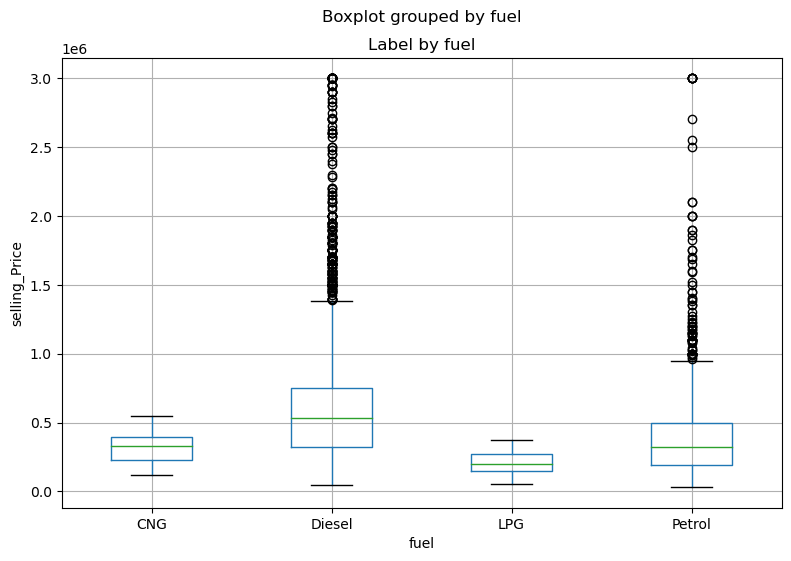

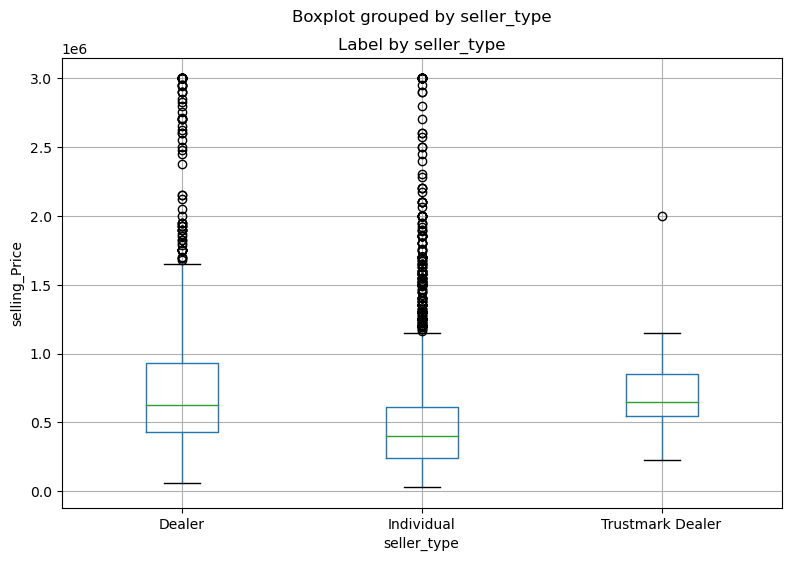

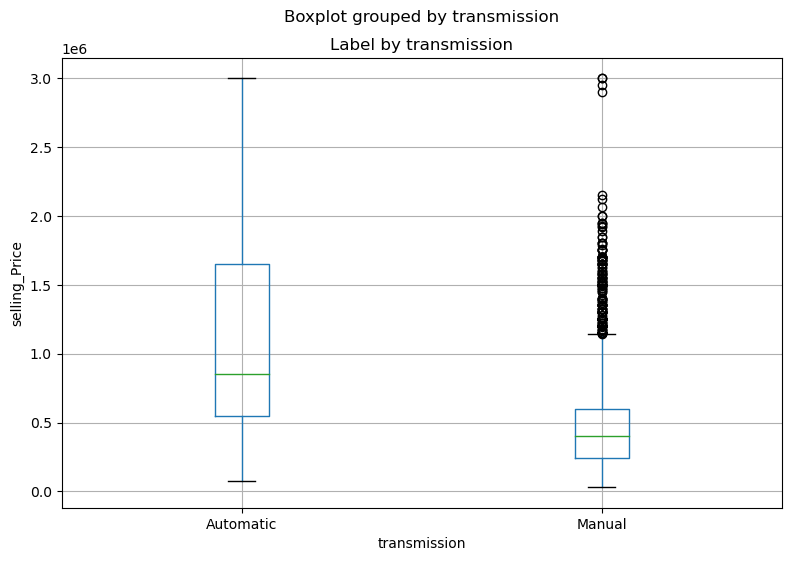

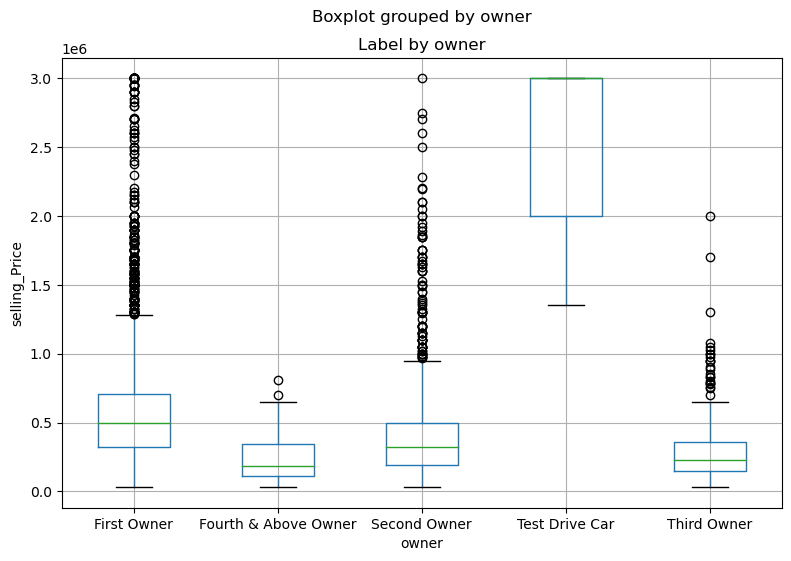

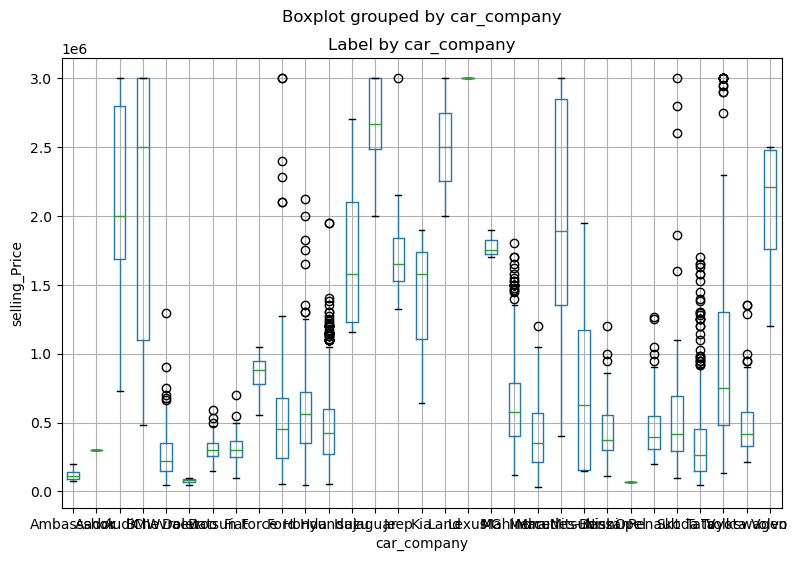

In [70]:
for col in categorical_features:
    if col == 'name':
        continue
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = 'selling_price', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("selling_Price")
plt.show()

<Figure size 2000x600 with 0 Axes>

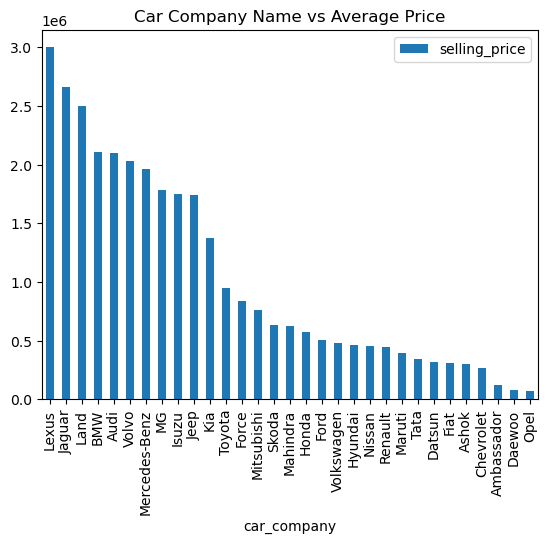

In [71]:
plt.figure(figsize=(20, 6))

df_car_mean = pd.DataFrame(df.groupby(['car_company'])['selling_price'].mean().sort_values(ascending = False))
df_car_mean.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

In [72]:
df_car_mean.rename(columns={'selling_price':'selling_price_mean'},inplace=True)

In [73]:
df = df.merge(df_car_mean,on = 'car_company',how = 'left')

In [74]:
df

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power_num,mileage_num,engine_num,torque_value,extracted_rpm,years_old,car_company,selling_price_mean
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,5.0,74.00,23.40,1248.0,190.000,2000.0,9,Maruti,394232.417546
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,103.52,21.14,1498.0,250.000,2000.0,9,Skoda,632258.016129
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,78.00,17.70,1497.0,124.587,2700.0,17,Honda,574460.207756
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,5.0,90.00,23.00,1396.0,219.744,2250.0,13,Hyundai,466436.374071
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,5.0,88.20,16.10,1298.0,112.815,4500.0,16,Maruti,394232.417546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6680,Maruti Wagon R VXI BS IV with ABS,260000,50000,Petrol,Individual,Manual,Second Owner,5.0,67.10,18.90,998.0,90.000,3500.0,10,Maruti,394232.417546
6681,Hyundai i20 Magna 1.4 CRDi,475000,80000,Diesel,Individual,Manual,Second Owner,5.0,88.73,22.54,1396.0,219.700,2125.0,9,Hyundai,466436.374071
6682,Hyundai i20 Magna,320000,110000,Petrol,Individual,Manual,First Owner,5.0,82.85,18.50,1197.0,113.700,4000.0,10,Hyundai,466436.374071
6683,Hyundai Verna CRDi SX,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,5.0,110.00,16.80,1493.0,235.440,2325.0,16,Hyundai,466436.374071


In [75]:
df['company_cat'] = df['selling_price_mean'].apply(lambda x : 1 if x < 500000 else (2 if 500000 <= x < 1500000 else 3))

In [76]:
df["company_cat"].value_counts()

1    4702
2    1815
3     168
Name: company_cat, dtype: int64

In [77]:
dataset_pr = df.copy()

In [78]:
### Data encoding
#label encoding
encoders_nums = {"owner":{"First Owner":4,"Second Owner":3,"Third Owner":2,"Fourth & Above Owner":1,"Test Drive Car":0}}
dataset_pr = dataset_pr.replace(encoders_nums)                 
                 
                 



In [79]:
dataset_pr

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power_num,mileage_num,engine_num,torque_value,extracted_rpm,years_old,car_company,selling_price_mean,company_cat
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,4,5.0,74.00,23.40,1248.0,190.000,2000.0,9,Maruti,394232.417546,1
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,3,5.0,103.52,21.14,1498.0,250.000,2000.0,9,Skoda,632258.016129,2
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,2,5.0,78.00,17.70,1497.0,124.587,2700.0,17,Honda,574460.207756,2
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,4,5.0,90.00,23.00,1396.0,219.744,2250.0,13,Hyundai,466436.374071,1
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,4,5.0,88.20,16.10,1298.0,112.815,4500.0,16,Maruti,394232.417546,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6680,Maruti Wagon R VXI BS IV with ABS,260000,50000,Petrol,Individual,Manual,3,5.0,67.10,18.90,998.0,90.000,3500.0,10,Maruti,394232.417546,1
6681,Hyundai i20 Magna 1.4 CRDi,475000,80000,Diesel,Individual,Manual,3,5.0,88.73,22.54,1396.0,219.700,2125.0,9,Hyundai,466436.374071,1
6682,Hyundai i20 Magna,320000,110000,Petrol,Individual,Manual,4,5.0,82.85,18.50,1197.0,113.700,4000.0,10,Hyundai,466436.374071,1
6683,Hyundai Verna CRDi SX,135000,119000,Diesel,Individual,Manual,1,5.0,110.00,16.80,1493.0,235.440,2325.0,16,Hyundai,466436.374071,1


In [80]:
# One hot encoding
dataset_pr = pd.get_dummies(dataset_pr, columns=["fuel", "seller_type","transmission"], prefix=["fu_", "seller_ty","transmission_"])

In [81]:
features = numerical_features.copy()

In [82]:
features

['km_driven', 'mileage_num', 'years_old']

In [83]:
dataset_pr

,name,selling_price,km_driven,owner,seats,max_power_num,mileage_num,engine_num,torque_value,extracted_rpm,...,company_cat,fu__CNG,fu__Diesel,fu__LPG,fu__Petrol,seller_ty_Dealer,seller_ty_Individual,seller_ty_Trustmark Dealer,transmission__Automatic,transmission__Manual
0,Maruti Swift Dzire VDI,450000,145500,4,5.0,74.00,23.40,1248.0,190.000,2000.0,...,1,0,1,0,0,0,1,0,0,1
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,3,5.0,103.52,21.14,1498.0,250.000,2000.0,...,2,0,1,0,0,0,1,0,0,1
2,Honda City 2017-2020 EXi,158000,140000,2,5.0,78.00,17.70,1497.0,124.587,2700.0,...,2,0,0,0,1,0,1,0,0,1
3,Hyundai i20 Sportz Diesel,225000,127000,4,5.0,90.00,23.00,1396.0,219.744,2250.0,...,1,0,1,0,0,0,1,0,0,1
4,Maruti Swift VXI BSIII,130000,120000,4,5.0,88.20,16.10,1298.0,112.815,4500.0,...,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6680,Maruti Wagon R VXI BS IV with ABS,260000,50000,3,5.0,67.10,18.90,998.0,90.000,3500.0,...,1,0,0,0,1,0,1,0,0,1
6681,Hyundai i20 Magna 1.4 CRDi,475000,80000,3,5.0,88.73,22.54,1396.0,219.700,2125.0,...,1,0,1,0,0,0,1,0,0,1
6682,Hyundai i20 Magna,320000,110000,4,5.0,82.85,18.50,1197.0,113.700,4000.0,...,1,0,0,0,1,0,1,0,0,1
6683,Hyundai Verna CRDi SX,135000,119000,1,5.0,110.00,16.80,1493.0,235.440,2325.0,...,1,0,1,0,0,0,1,0,0,1


In [84]:
dataset_pr.columns

Index(['name', 'selling_price', 'km_driven', 'owner', 'seats', 'max_power_num',
       'mileage_num', 'engine_num', 'torque_value', 'extracted_rpm',
       'years_old', 'car_company', 'selling_price_mean', 'company_cat',
       'fu__CNG', 'fu__Diesel', 'fu__LPG', 'fu__Petrol', 'seller_ty_Dealer',
       'seller_ty_Individual', 'seller_ty_Trustmark Dealer',
       'transmission__Automatic', 'transmission__Manual'],
      dtype='object')

In [85]:
features.extend(['owner','company_cat','fu__CNG', 'fu__Diesel', 'fu__LPG', 'fu__Petrol', 'seller_ty_Dealer',
       'seller_ty_Individual', 'seller_ty_Trustmark Dealer',
       'transmission__Automatic', 'transmission__Manual'])

In [86]:
features

['km_driven',
 'mileage_num',
 'years_old',
 'owner',
 'company_cat',
 'fu__CNG',
 'fu__Diesel',
 'fu__LPG',
 'fu__Petrol',
 'seller_ty_Dealer',
 'seller_ty_Individual',
 'seller_ty_Trustmark Dealer',
 'transmission__Automatic',
 'transmission__Manual']

In [87]:
len(features)

14

In [88]:
from scipy.stats import zscore
#Train test split
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
X = dataset_pr[features].apply(zscore)

In [89]:
y = np.log10(dataset_pr['selling_price'])

In [90]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(5348, 14)
(1337, 14)


In [91]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [92]:
reg.score(X_train, y_train)

0.7593386180362638

In [93]:
reg.coef_

array([-0.01196915, -0.06115855, -0.22151762,  0.01358819,  0.05958015,
       -0.00616071,  0.04824669, -0.00394641, -0.04671976,  0.00895851,
       -0.00901592,  0.00102923,  0.02366299, -0.02366299])

In [94]:
reg.intercept_

5.598119612172232

In [95]:
y_pred = reg.predict(X_test)

In [96]:
y_pred

array([5.84323597, 5.97819529, 5.45831764, ..., 5.26577566, 5.43405569,
       5.80065384])

In [97]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 43503259214.01663
RMSE : 208574.34936735782


In [98]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.7243353140863078
Adjusted R2 :  0.7214160208920629


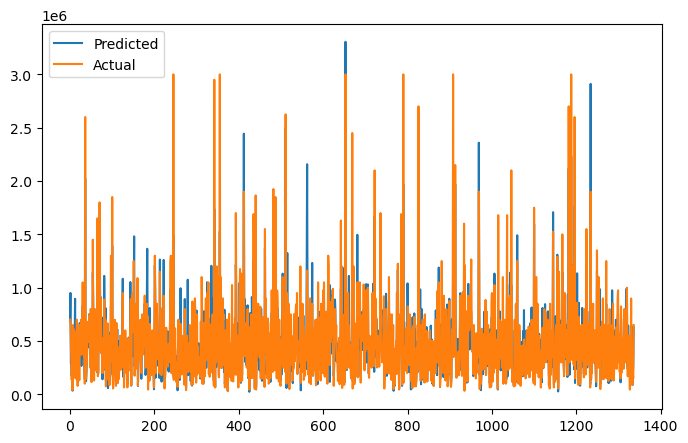

In [99]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [100]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [101]:
lasso.score(X_train, y_train)

0.7593377652778333

In [102]:
lasso.coef_

array([-0.01182586, -0.06097091, -0.22145783,  0.01353107,  0.05959895,
        0.        ,  0.08377331,  0.00109651, -0.0111192 ,  0.01122876,
       -0.00665677,  0.00143054,  0.047298  , -0.        ])

In [103]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [104]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -0.02471582100966751


In [105]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [106]:
y_pred_lasso

array([5.84264612, 5.97654483, 5.45493755, ..., 5.26811654, 5.43597382,
       5.79940197])

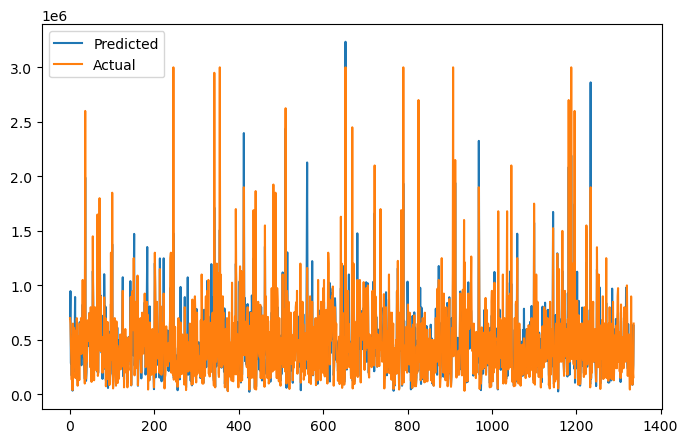

In [107]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [108]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 43778198311.43438
RMSE : 209232.4026326572
R2 : 0.7225931227814633
Adjusted R2 :  0.7196553797549432


In [109]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [110]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -0.024741091580510282


In [111]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [112]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 43504085433.100204
RMSE : 208576.329992404
R2 : 0.7243300786297402
Adjusted R2 :  0.721410729991931


In [113]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [114]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [115]:
elasticnet.score(X_train, y_train)

0.6504426879018215

In [116]:
y_pred_en = elasticnet.predict(X_test)

In [117]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 83195484593.62651
RMSE : 288436.2747534133
R2 : 0.4728197945557565
Adjusted R2 :  0.46723694820460715


In [118]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [119]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001, 'l1_ratio': 0.8}

Using  {'alpha': 0.001, 'l1_ratio': 0.8}  the negative mean squared error is:  -0.024715587510269164


In [120]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [121]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 43720210793.323555
RMSE : 209093.78468362842
R2 : 0.7229605690660806
Adjusted R2 :  0.7200267173012735


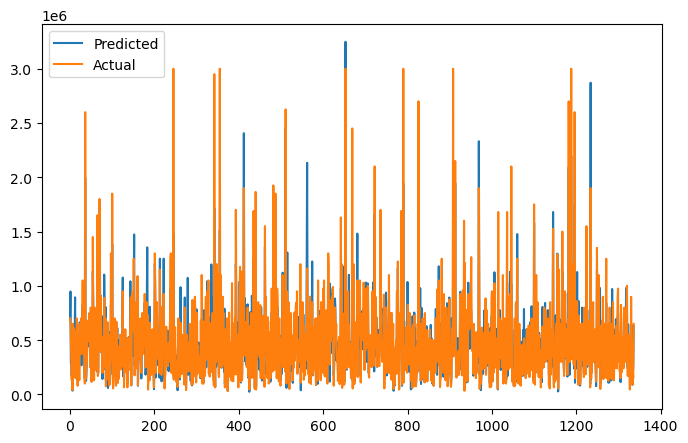

In [122]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_elastic))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Different models to evaluate

In [123]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

In [124]:
numeric_features1 = list(numeric_features )

In [125]:
numeric_features1.remove('selling_price')

In [126]:
numeric_features1.extend(['owner','company_cat','fu__CNG', 'fu__Diesel', 'fu__LPG', 'fu__Petrol', 'seller_ty_Dealer',
       'seller_ty_Individual', 'seller_ty_Trustmark Dealer',
       'transmission__Automatic', 'transmission__Manual'])

In [127]:
X1 = dataset_pr[numeric_features1]

In [128]:
X1

,km_driven,seats,max_power_num,mileage_num,engine_num,torque_value,extracted_rpm,years_old,owner,company_cat,fu__CNG,fu__Diesel,fu__LPG,fu__Petrol,seller_ty_Dealer,seller_ty_Individual,seller_ty_Trustmark Dealer,transmission__Automatic,transmission__Manual
0,145500,5.0,74.00,23.40,1248.0,190.000,2000.0,9,4,1,0,1,0,0,0,1,0,0,1
1,120000,5.0,103.52,21.14,1498.0,250.000,2000.0,9,3,2,0,1,0,0,0,1,0,0,1
2,140000,5.0,78.00,17.70,1497.0,124.587,2700.0,17,2,2,0,0,0,1,0,1,0,0,1
3,127000,5.0,90.00,23.00,1396.0,219.744,2250.0,13,4,1,0,1,0,0,0,1,0,0,1
4,120000,5.0,88.20,16.10,1298.0,112.815,4500.0,16,4,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6680,50000,5.0,67.10,18.90,998.0,90.000,3500.0,10,3,1,0,0,0,1,0,1,0,0,1
6681,80000,5.0,88.73,22.54,1396.0,219.700,2125.0,9,3,1,0,1,0,0,0,1,0,0,1
6682,110000,5.0,82.85,18.50,1197.0,113.700,4000.0,10,4,1,0,0,0,1,0,1,0,0,1
6683,119000,5.0,110.00,16.80,1493.0,235.440,2325.0,16,1,1,0,1,0,0,0,1,0,0,1


In [129]:
y1 = dataset_pr["selling_price"]

In [130]:
y1

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
6680    260000
6681    475000
6682    320000
6683    135000
6684    382000
Name: selling_price, Length: 6685, dtype: int64

In [131]:
#List of regression models
regression_models = [
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    xgb.XGBRegressor()
]

In [132]:
X1_train, X1_test, y1_train, y1_test = train_test_split( X1,y1 , test_size = 0.2, random_state = 0) 
print(X1_train.shape)
print(X1_test.shape)

(5348, 19)
(1337, 19)


In [133]:
y1_test

6221    700000
3746    650000
3559    500000
729     320000
6683    135000
         ...  
2346    330000
326      89000
1524    210000
5845    150000
2396    650000
Name: selling_price, Length: 1337, dtype: int64

In [134]:
# Iterate over each model and evaluate its performance using cross-validation
for model in regression_models:
    # For regression, you might use metrics like MSE or R-squared
    scores = cross_val_score(model, X1_train, y1_train, cv=5, scoring='r2')  
    
    # Print the mean of the chosen metric for the current model
    print(f"{model.__class__.__name__}: Mean R-squared = {scores.mean()}")

DecisionTreeRegressor: Mean R-squared = 0.8577090170038666
RandomForestRegressor: Mean R-squared = 0.9233424430898458
GradientBoostingRegressor: Mean R-squared = 0.914717058992132
XGBRegressor: Mean R-squared = 0.922490416225848


In [135]:
randomf_model = RandomForestRegressor(n_estimators=300, random_state = 10, n_jobs = -1)

In [136]:
#Fit
randomf_model.fit(X1_train, y1_train)

y1_pred = randomf_model.predict(X1_test)

#Checking the accuracy
randomf_model_accuracy = round(randomf_model.score(X1_train, y1_train)*100,2)
print(round(randomf_model_accuracy, 2), '%')

98.94 %


In [143]:
MSE  = mean_squared_error((y1_test), (y1_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y1_test), (y1_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y1_test), (y1_pred)))*((X1_test.shape[0]-1)/(X1_test.shape[0]-X1_test.shape[1]-1)))

MSE : 14894651623.18045
RMSE : 122043.64638595673
R2 : 0.9056178885058114
Adjusted R2 :  0.9042562635108307


In [137]:
randomf_model_accuracy1 = round(randomf_model.score(X1_test, y1_test)*100,2)
print(round(randomf_model_accuracy1, 2), '%')

90.56 %


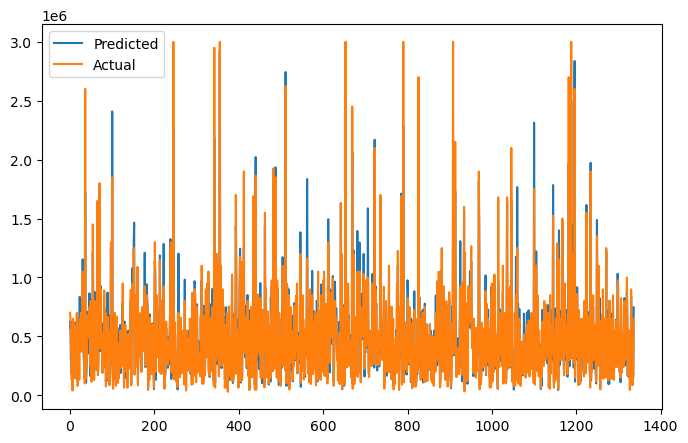

In [138]:
plt.figure(figsize=(8,5))
plt.plot(y1_pred)
plt.plot((np.array(y1_test)))
plt.legend(["Predicted","Actual"])
plt.show()